# Importing Modules

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import TransactionEncoder

# Ignore DeprecationWarning messages
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import variance inflation factor from StatsModels library
from scipy.stats import pearsonr, spearmanr, kruskal 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols

from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import r2_score, mean_squared_error, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Loading Dataset

In [2]:
#Setting dataframe display to show all rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None


#Loading the mhs dataset in excel format
df = pd.read_excel('mhs.xls')

#Viewing the first 5 rows 
df.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# Exploratory Data Analysis

In [3]:
# Viewing dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Viewing the columns of the dataset
df.columns

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [5]:
#Checking for missing values
df.isnull().sum()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [6]:
#Summary Statistics
df.describe().T

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


In [7]:
#The mean heartrate, systolicbp and diastolicbp
print(df.HeartRate.mean())
print(df.SystolicBP.mean())
print(df.DiastolicBP.mean())

74.30177514792899
113.19822485207101
76.46055226824457


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#The meadian heartrate, systolicbp and diastolicbp
print(df.HeartRate.median())
print(df.SystolicBP.median())
print(df.DiastolicBP.median())

76.0
120.0
80.0


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


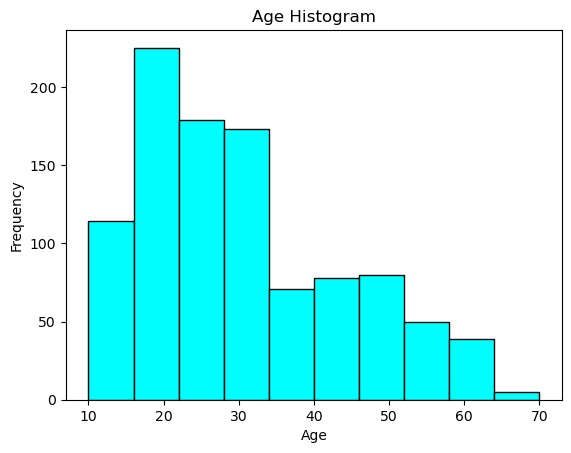

In [9]:
# Plot the histogram
plt.hist(df.Age, bins=10, color='cyan', edgecolor='black')

# Set the plot title and the labels
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [10]:
# Check for heartrate less than 60 (detected fake entries)
# Normal heartrate if from 60 to 100 beats per minute 
#(https://www.bhf.org.uk/informationsupport/how-a-healthy-heart-works/your-heart-rate)
df[df['HeartRate']<60]

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
499,16,120,75,7.9,98.0,7,low risk
908,16,120,75,7.9,98.0,7,low risk


In [11]:
# Investigating information in  row 499
df.loc[499]

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age                  16
SystolicBP          120
DiastolicBP          75
BS                  7.9
BodyTemp           98.0
HeartRate             7
RiskLevel      low risk
Name: 499, dtype: object

In [12]:
# Calculate the mean of HeartRate
median_heartrate = df['HeartRate'].median()

# Change the value of HearRate in index 499 and 908 with the mean HeartRate
df.loc[499, 'HeartRate'] = median_heartrate
df.loc[908, 'HeartRate'] = median_heartrate

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Confirmation information in  row 499
df.loc[499]

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age                  16
SystolicBP          120
DiastolicBP          75
BS                  7.9
BodyTemp           98.0
HeartRate            76
RiskLevel      low risk
Name: 499, dtype: object

In [14]:
# Checking for empty cells in Age column
print(f"{df[df['Age']==' ']}")

Empty DataFrame
Columns: [Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel]
Index: []


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


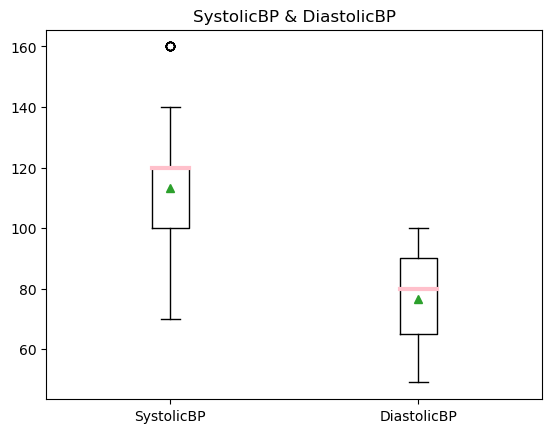

In [15]:
# Create a boxplot
fig, ax = plt.subplots()
bp = ax.boxplot([df['SystolicBP'], df['DiastolicBP']], showfliers=True, showmeans=True)

# Aet labels and title
ax.set_xticklabels(['SystolicBP', 'DiastolicBP'])
ax.set_title('SystolicBP & DiastolicBP')

# Add median to the boxplot
for median in bp['medians']:
    median.set(color='pink', linewidth=3)

plt.show()

In [16]:
# Specify the columns to plot
cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

def plot_histograms_subplots(data, columns):
    """
    This plots histogram of the specified columns(cols) above in subplots.
    
 
    Params:
        data (DataFrame): A Pandas DataFrame containing the data to plot.
        cols (list): A list of column names to plot as subplots.
    
    Returns:
        None
    """
    # Determine the number of columns to plot by calling the 'len' function on the columns
    num_cols = len(columns)
    
    # Create the figure and subplots 
    fig, axs = plt.subplots(1, num_cols, figsize=(5*num_cols, 5))
    
    # Loop over each column and plot a histogram in a separate subplot
    for i, col in enumerate(columns):
        axs[i].hist(data[col], bins=10, edgecolor='black')
        
    # Setting the title and labels
        axs[i].set_title(f'Histogram of {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Frequency')
    
    # Display the plot
    plt.show()
    
    
    
def plot_bar_subplots(data, x_col, y_cols, order_col):
    """
    This plots subplots of bar plots for multiple y columns in a pandas dataframe
    
    Params:
        data (DataFrame): Input dataframe
        x_col (str): Name of the column to use for the x-axis
        y_cols (list): List of the columns to use for the y-axis in the subplots

    Returns:
        None

    """
    # Calculates the number of rows and columns required for the subplots
    n_rows = len(y_cols) // 2 + len(y_cols) % 2
    n_cols = 2
    
    # Creates the subplots and Convert the 2D array of axes to a 1D array using flatten
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
    axes = axes.flatten()  
    
    # Loop through each y_col and creates a bar plot on a separate subplot
    for i, y_col in enumerate(y_cols):
        ax = axes[i]
        sns.barplot(x=x_col, y=y_col, data=data, order=order_col, ax=ax)
        
    #Setting title and labels
        ax.set_title(f'({y_col} and {x_col} plot)')
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
    
    # Removes any extra subplots that were not used
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust the layout of the subplots
    plt.tight_layout()
    
    # Display plot
    plt.show()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


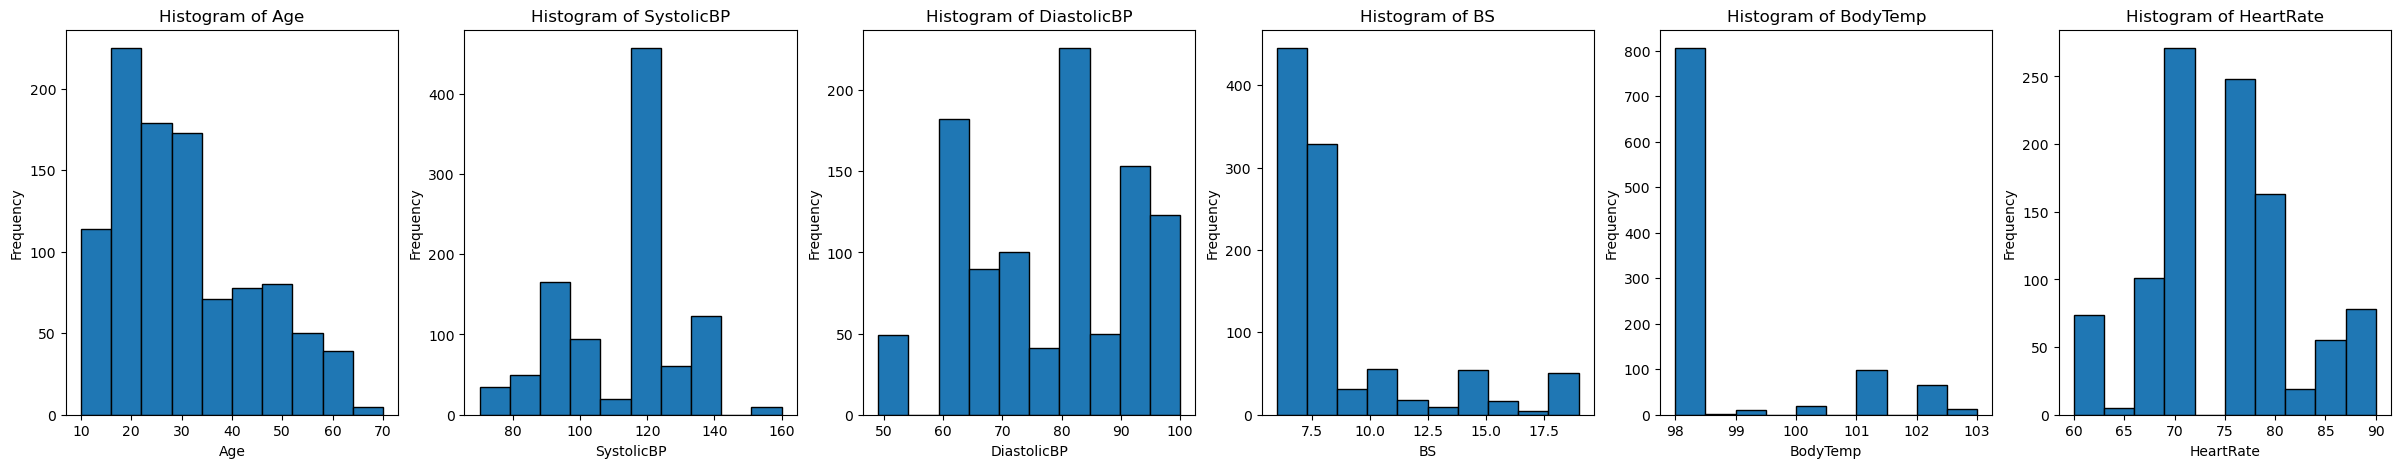

In [17]:
# Call the histogram_subplot funtion on the dataframe with the specified columns
plot_histograms_subplots(df, cols)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


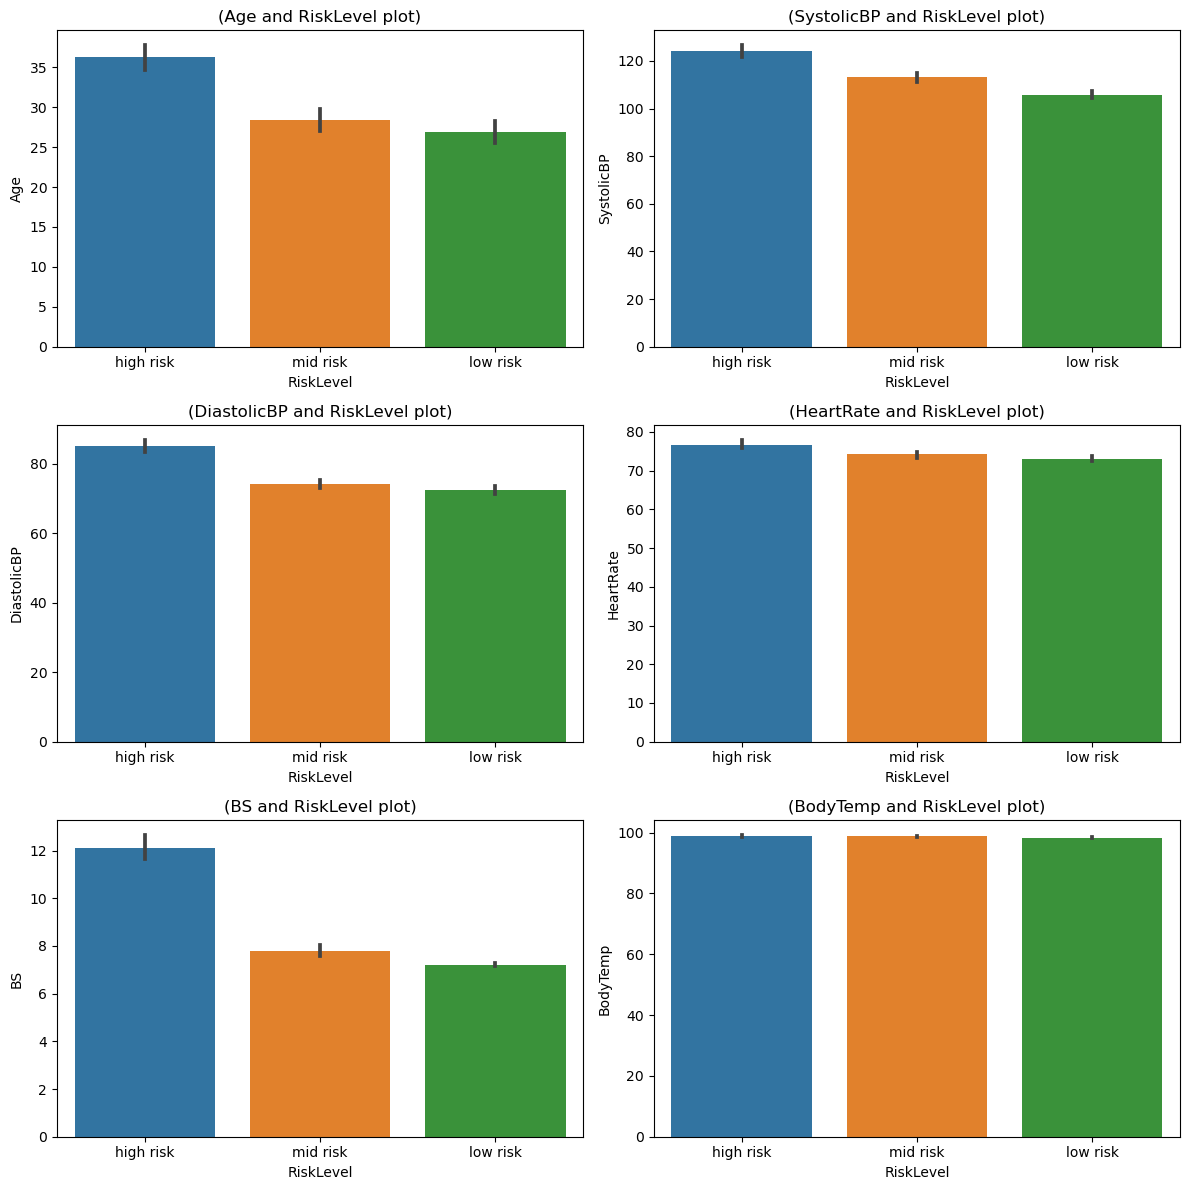

In [18]:
#Call the bar_subplots funtion passing the dataframe, x_col and list of y_cols to include in subplots
plot_bar_subplots(df, 'RiskLevel', ['Age', 'SystolicBP','DiastolicBP','HeartRate','BS','BodyTemp'], ['high risk', 'mid risk', 'low risk'])

In [19]:
# Checking for correlation between variables
df.corr()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-0d1702b23f78>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.067229
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.018173
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.051582
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.149233
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.097523
HeartRate,0.067229,-0.018173,-0.051582,0.149233,0.097523,1.000000


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-5fb50b82cf24>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='summer')


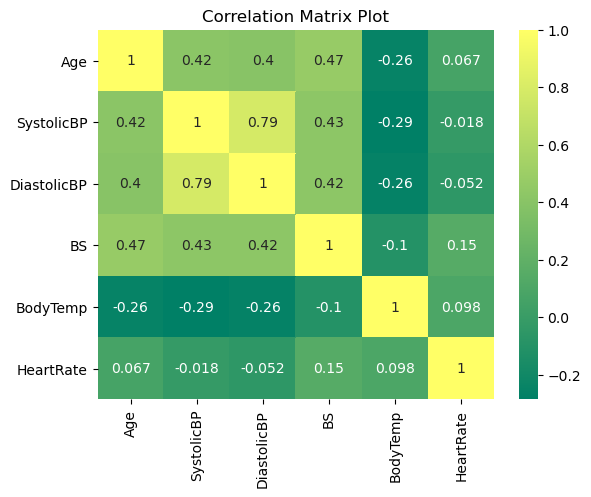

In [20]:
# Plotting correlation matrix to show relationship strength (same as plotting pairplots)
plt.figure(dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='summer')

plt.title('Correlation Matrix Plot')
# Display plot
plt.show()

#Creating pairplots to show relationships between dataframe columns
#sns.pairplot(df)
#plt.show()

# Hypothesis Testing

## Ordinary Least Squares Method

In [21]:
# Encode the categorical variable with pd.get_dummies
df_dummy = pd.get_dummies(df)
df_dummy

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_low risk,RiskLevel_mid risk
0,25,130,80,15.00,98.0,86,1,0,0
1,35,140,90,13.00,98.0,70,1,0,0
2,29,90,70,8.00,100.0,80,1,0,0
3,30,140,85,7.00,98.0,70,1,0,0
4,35,120,60,6.10,98.0,76,0,1,0
5,23,140,80,7.01,98.0,70,1,0,0
6,23,130,70,7.01,98.0,78,0,0,1
7,35,85,60,11.00,102.0,86,1,0,0
8,32,120,90,6.90,98.0,70,0,0,1
9,42,130,80,18.00,98.0,70,1,0,0


In [22]:
for col in [['Age','BS','HeartRate','BodyTemp','DiastolicBP','RiskLevel_high risk','RiskLevel_low risk','RiskLevel_mid risk']]:
    x = df_dummy[col]
y= df_dummy['SystolicBP']

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
model_ols = sm.OLS(y,x)
fit = model_ols.fit()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
fit.pvalues

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age                     1.049585e-03
BS                      2.252018e-01
HeartRate               7.912148e-01
BodyTemp                5.332460e-09
DiastolicBP            1.649379e-146
RiskLevel_high risk     1.337639e-12
RiskLevel_low risk      3.043643e-12
RiskLevel_mid risk      8.509104e-13
dtype: float64

In [25]:
# Showing the summary of the OLS result
fit.summary()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SystolicBP   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     283.4
Date:                Thu, 11 May 2023   Prob (F-statistic):          6.97e-233
Time:                        17:36:03   Log-Likelihood:                -3839.4
No. Observations:                1014   AIC:                             7695.
Df Residuals:                    1006   BIC:                             7734.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                     0.0981      0.030      3.286      0.001       0.040       0.157
BS                      0.1765      0.145      1.214      0.225      -0.109       0.462
HeartRate              -0.0123      0.046     -0.265      0.791      -0.103       0.079
BodyTemp               -1.6078      0.273     -5.888      0.000      -2.144      -1.072
DiastolicBP             0.8958      0.029     30.690      0.000       0.839       0.953
RiskLevel_high risk   202.2494     28.162      7.182      0.000     146.987     257.512
RiskLevel_low risk    196.0391     27.757      7.063      0.000     141.571     250.507
RiskLevel_mid risk    202.3177     27.920      7.246      0.000     147.530     257.105
==============================================================================
Omnibus:                       13.518   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.901
Skew:                           0.286   Prob(JB):                     0.000958
Kurtosis:                       2.948   Cond. No.                     2.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Iterating the different columns , setting the independent variables as x
for col in [['Age','BS','HeartRate','BodyTemp','DiastolicBP']]:
    x = df[col]
# Setting the independent variable as y
y= df['SystolicBP']

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# fit the OLS model on both y and x
model_ols = sm.OLS(y,x)
fit = model_ols.fit()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Showing the summary results of the OLS
fit.summary()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             SystolicBP   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.113e+04
Date:                Thu, 11 May 2023   Prob (F-statistic):                        0.00
Time:                        17:36:03   Log-Likelihood:                         -3884.3
No. Observations:                1014   AIC:                                      7779.
Df Residuals:                    1009   BIC:                                      7803.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Age             0.1346      0.031      4.400      0.000       0.075       0.195
BS              0.4072      0.128      3.176      0.002       0.156       0.659
HeartRate       0.0297      0.048      0.619      0.536      -0.064       0.124
BodyTemp        0.2981      0.041      7.251      0.000       0.217       0.379
DiastolicBP     0.9676      0.029     33.836      0.000       0.911       1.024
==============================================================================
Omnibus:                       39.427   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.393
Skew:                           0.507   Prob(JB):                     3.78e-10
Kurtosis:                       3.012   Cond. No.                         54.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis of Variance

In [29]:
# Function for Analysis of variance 
def ANOVA(data_):
    
    #Define the model formula
    formula = 'SystolicBP ~ BS + BodyTemp + DiastolicBP + HeartRate + RiskLevel + Age'
    #Fit a model using Ordinary Least Squares (OLS) method
    model = ols(formula, data=data_).fit()
    
    #Analysis of variance on fitted model
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    #Return ANOVA results
    return anova_table

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Calling the function to print out the ANOVA results
ANOVA(df)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sum_sq,df,F,PR(>F)
RiskLevel,7525.405059,2.0,32.788874,1.602765e-14
BS,169.002737,1.0,1.472721,2.252018e-01
BodyTemp,3977.987981,1.0,34.664911,5.332460e-09
DiastolicBP,108083.358455,1.0,941.858048,1.649379e-146
HeartRate,8.046779,1.0,0.070121,7.912148e-01
Age,1239.461083,1.0,10.800889,1.049585e-03
Residual,115443.998004,1006.0,NaN,NaN


## Kruskal Wallis Test

In [31]:
def kruskal_wallis_test(data, cont_var, cat_var):
    """
    Performs the Kruskal-Wallis test on a continuous variable grouped by a categorical variable.

    Parameters:
    -----------
    data: pandas.DataFrame
        The dataframe containing the variables.
    cont_var: str
        The name of the continuous variable column in the dataframe.
    cat_var: str
        The name of the categorical variable column in the dataframe.

    Returns:
    --------
    H: float
        The Kruskal-Wallis H-statistic.
    pval: float
        The p-value associated with the H-statistic.
    """
    # Get unique categories and their indices
    cat_vals, cat_inds = np.unique(data[cat_var], return_inverse=True)
    
    if len(cat_inds) != len(data):
        raise ValueError("Length of categorical variable must be equal to number of rows in dataframe.")

    # Calculate the H-statistic and p-value
    H, pval = kruskal(*[data.loc[cat_inds==i, cont_var] for i in range(len(cat_vals))])

    return H, pval

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
for column in ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']:
    # Perform Kruskal-Wallis test
    H, pval = kruskal_wallis_test(df, column, 'RiskLevel')

    # Print results
    print(f"Kruskal-Wallis H-statistic for {column}: {H:.4f}")
    print(f"p-value: {pval}")
    print('/n')

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kruskal-Wallis H-statistic for Age: 98.6163
p-value: 3.852454380105611e-22
/n
Kruskal-Wallis H-statistic for SystolicBP: 166.0879
p-value: 8.599404959533086e-37
/n
Kruskal-Wallis H-statistic for DiastolicBP: 133.7577
p-value: 9.013405787419557e-30
/n
Kruskal-Wallis H-statistic for BS: 303.7436
p-value: 1.1038642477348208e-66
/n
Kruskal-Wallis H-statistic for BodyTemp: 32.9277
p-value: 7.076890996304855e-08
/n
Kruskal-Wallis H-statistic for HeartRate: 36.3940
p-value: 1.2506632324156236e-08
/n


# Linear Regression Model

## Functions necessary for analysis

In [33]:
#function that helps select the target and independent variables and then splits the dataset into training and test sets
def train_test_split_(data, y_):
    """
    This function performs train_test_split on a dataframe.
    
    Params:
        data (DataFrame): Input dataframe
        y_ (str): Name of the target variable
        
    Returns:
        X_train: The training dataframe(excluding the target variable)
        X_test: The testing dataframe(excluding the target variable)
        X_val: The validation dataframe(excluding the target variable)
        y_train: The target dataframe(for training) 
        y_test: The target dataframe(for testing) 
        y_val: The target dataframe(for validation) 
        
    """
    # Splits data into independent(X) and target(y) variables 
    X = data.drop(y_, axis = 1)
    y = data[y_]

    #splits into training and test sets 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
    X, y = X_train, y_train

    #Further splits training set into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state = 42)

    #Returns the training, validation and test sets
    return X_train, X_test, X_val, y_train, y_test, y_val





#function to separate data into numerical and categorical data
def categorical_numeric_data(data):
    """
    This function separates dataset into numeric and category.
    
    Params:
        data (DataFrame): Input dataframe
        
    Returns:
         numerical_df: Numeric Dataframe (float, int)
         categorical_df: Categorical Dataframe (str)
        
    """ 
    # Separates dataframe into numerical and categorical
    numerical_df = data.select_dtypes(exclude = 'object')   
    categorical_df = data.select_dtypes(include = 'object') 
    
    # Returns numerical and categorical dataframes respectively
    return numerical_df, categorical_df

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
def one_hot_encod_(X_tr, X_te, X_va):
    """
    This function encodes categorical independent variables.
    
    Params:
        X_tr: Training set to be encoded
        X_te: Testing set to be encoded
        X_va: Validation set to be encoded
        
    Returns:
         X_train_ohe: The encoded training set
         X_test_ohe: The encoded testing set
         X_val_ohe: The encoded validation set
        
    """ 
    # Instantiating the OnHotEncoder 
    ohe = ce.OneHotEncoder(use_cat_names = True, handle_unknown='value', drop_invariant=True)

    X_train_ohe = ohe.fit_transform(X_tr) #Encoding the training set
    X_test_ohe = ohe.transform(X_te)     #Encoding the training set
    X_val_ohe = ohe.transform(X_va)      #Encoding the training set
    
    # Returns encoded training, testing and validation sets 
    return X_train_ohe, X_test_ohe, X_val_ohe





# Function defined to scale numeric features
def scaling_(X_tr, X_te, X_v):
    """
    This function performs feature sclaing on the numeric independent variables.
    
    Params:
         X_tr: Training set to be scaled
         X_te: Testing set to be scaled
         X_va: Validation set to be scaled
        
    Returns:
         X_scaled_tr: The scaled training set
         X_scaled_te: The scaled testing set
         X_scaled_v: The scaled validation set
        
    """ 
    
    scaler = StandardScaler()                 #Instantiating StandardScaler
    X_scaled_tr = scaler.fit_transform(X_tr)  #Scaling the training set
    X_scaled_te = scaler.transform(X_te)      #Scaling the training set
    X_scaled_v = scaler.transform(X_v)        #Scaling the training set
    
    # Converting the scaled training, testing and validation sets to a pandas dataframe
    X_scaled_tr = pd.DataFrame(X_scaled_tr, columns= X_tr.columns, index = X_tr.index)
    X_scaled_te = pd.DataFrame(X_scaled_te, columns= X_tr.columns, index = X_te.index)
    X_scaled_v = pd.DataFrame(X_scaled_v, columns = X_tr.columns, index = X_v.index)
    
    # Returns the scaled training, testing and validation sets
    return X_scaled_tr, X_scaled_te, X_scaled_v



#function defined to concatenate the scaled numeric features and the encoded categorical variables
def concat_(df1, df2):
    """
    This function separates dataset into numeric and category.
    
    Params:
        df1: Numerical Input dataframe
        df2: Categorical Input dataframe
        
    Returns:
         X_concat_df: Dataframe containing scaled numerical and encoded categorical dataframes
        
    """ 
    # Concatenating df1 and df2 across axis
    X_concat_df = pd.concat([df1,df2], axis = 1)
    
    # Returns the merged dataframes
    return X_concat_df

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Running linear regression model with all variables, setting 'SystolicBP' as target

In [35]:
# Calling train_test_split function on df with target variable as 'SystolicBP'
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(df, 'SystolicBP')

# Spliting independent variables into numerical and categorical.
X_train_num, X_train_cat = categorical_numeric_data(X_train)
X_test_num, X_test_cat = categorical_numeric_data(X_test)
X_val_num, X_val_cat = categorical_numeric_data(X_val)

# Scaling the numerical data
X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train_num, X_test_num, X_val_num)

# Encoding the Categorical data
X_train_encoded, X_test_encoded, X_val_encoded = one_hot_encod_(X_train_cat, X_test_cat, X_val_cat)

# Concatenating the numrical and categorical dataframes
X_train_df, X_test_df, X_val_df= concat_(X_scaled_num_tr, X_train_encoded), concat_(X_scaled_num_te, X_test_encoded), concat_(X_scaled_num_v, X_val_encoded)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
# Training Dataframe showing the first 5 rows
X_train_df.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_high risk,RiskLevel_mid risk,RiskLevel_low risk
367,0.409222,1.740875,-0.285628,-0.493867,-1.121064,1,0,0
437,-0.044458,-0.451714,0.387115,-0.493867,0.698309,1,0,0
711,0.031155,0.279149,-0.560841,1.663610,0.178488,0,1,0
945,-0.573750,0.644580,-0.377365,-0.493867,1.737951,0,0,1
563,-0.951817,-0.817145,-0.377365,3.101927,-0.991109,0,0,1


In [37]:
# Instantiating linear regression model
linear_regressor = LinearRegression()

# Fiting Linear regression on the training sets, considering all variables
linear_regressor.fit(X_train_df, y_train)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

In [38]:
# Predicting on training, testing and validation independent varibles
train_pred = linear_regressor.predict(X_train_df)
test_pred= linear_regressor.predict(X_test_df)
#val_pred = linear_regressor.predict(X_val_df)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
print("Train")
print(f"The Training Mean Squared Error is: {mean_squared_error(y_train, train_pred):.2f}")
print(f"The Training Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_train, train_pred)):.2f}")

print('\n')
print("Test")
print(f"The Testing Mean Squared Error is: {mean_squared_error(y_test, test_pred):.2f}")
print(f"The Testing Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, test_pred)):.2f}")

#print('\n')
#print("Validation")
#print(f"The Validation Mean Squared Error is: {mean_squared_error(y_val, val_pred):.2f}")
#print(f"The Validation Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_val, val_pred)):.2f}")

Train
The Training Mean Squared Error is: 115.81
The Training Root Mean Squared Error is: 10.76


Test
The Testing Mean Squared Error is: 112.05
The Testing Root Mean Squared Error is: 10.59


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


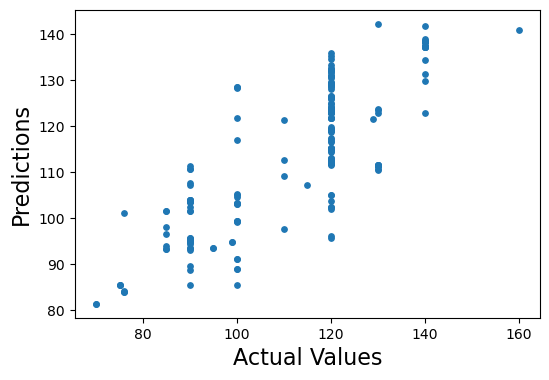

In [40]:
# https://www.geeksforgeeks.org/convert-a-numpy-array-to-a-pandas-series/  1/12/2022 
y_pred_df = pd.DataFrame(list(zip(y_test,test_pred)), columns = ['y_test','predictions'])

# Plotting predictions.
plt.figure(figsize=(6,4))
plt.scatter(data = y_pred_df, x = 'y_test', y='predictions', s=15)
plt.xlabel('Actual Values',fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.show()

## Dropping 'RiskLevel' and HeartRate  to perform linear regression model

In [41]:
def train_test_split__(data, y_):
    """
    This function performs train_test_split on a dataframe.
    
    Params:
        data (DataFrame): Input dataframe
        y_ (str): Name of the target variable
        
    Returns:
        X_train: The training dataframe(excluding the target variable)
        X_test: The testing dataframe(excluding the target variable)
        X_val: The validation dataframe(excluding the target variable)
        y_train: The target dataframe(for training) 
        y_test: The target dataframe(for testing) 
        y_val: The target dataframe(for validation) 
        
    """
    
    # Splits data into independent(X) and target(y) variables and dropping categorical and target variables.
    X = data.drop(['RiskLevel','HeartRate',y_], axis = 1)
    y = data[y_]
    
    # Splitting into training, testing and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
    X, y = X_train, y_train
    
    # Further splits into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state = 42)
    
    # Return training, testing and validation sets 
    return X_train, X_test, X_val, y_train, y_test, y_val

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Splitting into training, testing and validation sets
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split__(df, 'SystolicBP')

# Scaling the training, testing and validation sets
X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train, X_test, X_val)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
X_train.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,DiastolicBP,BS,BodyTemp
367,35,100,7.80,98.0
437,29,70,10.00,98.0
711,30,80,6.90,101.0
945,22,85,7.50,98.0
563,17,65,7.50,103.0
935,20,90,7.50,98.0
806,25,80,7.90,98.0
850,12,50,6.40,98.0
325,22,65,6.90,98.0
738,13,65,7.90,101.0


In [44]:
# Initializing linear regression model
linear_regressor = LinearRegression()

# Fitting on the scaled numeric data and training target
linear_regressor.fit(X_scaled_num_tr, y_train)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

In [45]:
# Using linear regression model to predict on the training, testing and validation sets 
test_preds = linear_regressor.predict(X_scaled_num_te)
train_preds = linear_regressor.predict(X_scaled_num_tr)
val_preds = linear_regressor.predict(X_scaled_num_v)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
print("Test")
print(f"The Mean Squared Error is: {mean_squared_error(y_test, test_preds):.2f}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, test_preds)):.2f}")

print('\n')
print("Train")
print(f"The Mean Squared Error is: {mean_squared_error(y_train, train_preds):.2f}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_train, train_preds)):.2f}")

print('\n')
print("Validation")
print(f"The Mean Squared Error is: {mean_squared_error(y_val, val_preds):.2f}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_val, val_preds)):.2f}")

Test
The Mean Squared Error is: 122.19
The Root Mean Squared Error is: 11.05


Train
The Mean Squared Error is: 124.03
The Root Mean Squared Error is: 11.14


Validation
The Mean Squared Error is: 110.49
The Root Mean Squared Error is: 10.51


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


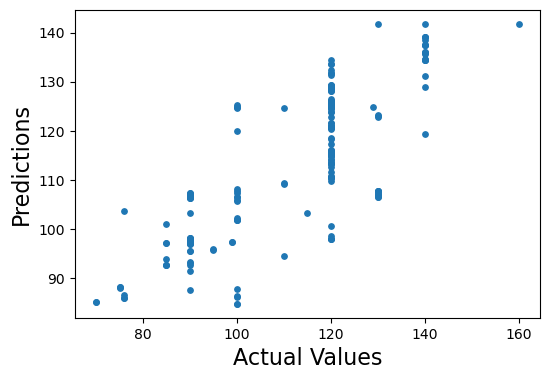

In [47]:
#https://www.geeksforgeeks.org/convert-a-numpy-array-to-a-pandas-series/  1/12/2022
y_pred_df = pd.DataFrame(list(zip(y_test,test_preds)), columns = ['y_test','predictions'])
y_pred_df

#these predictions are based on the two features selected.
plt.figure(figsize=(6,4))
plt.scatter(data = y_pred_df, x = 'y_test', y='predictions', s=15)
plt.xlabel('Actual Values',fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.show()

## Building Linear Model with Variables chosen based on Ordinary Least Squares

In [48]:
new_df = df[['Age', 'BS', 'BodyTemp','DiastolicBP','SystolicBP']]
new_df.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,BS,BodyTemp,DiastolicBP,SystolicBP
0,25,15.0,98.0,80,130
1,35,13.0,98.0,90,140
2,29,8.0,100.0,70,90
3,30,7.0,98.0,85,140
4,35,6.1,98.0,60,120


In [49]:
# Calling train_test_split function on df with target variable as 'SystolicBP'
X_train, X_test, X_val, y_train, y_test, y_val  = train_test_split_(new_df, 'SystolicBP')

# Scaling the numerical data
X_scaled_num_tr, X_scaled_num_te, X_scaled_num_v = scaling_(X_train, X_test, X_val)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Training Dataframe showing the first 5 rows
X_scaled_num_tr.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,BS,BodyTemp,DiastolicBP
367,0.409222,-0.285628,-0.493867,1.740875
437,-0.044458,0.387115,-0.493867,-0.451714
711,0.031155,-0.560841,1.663610,0.279149
945,-0.573750,-0.377365,-0.493867,0.644580
563,-0.951817,-0.377365,3.101927,-0.817145


In [51]:
# Instantiating linear regression model
linear_regressor = LinearRegression()

# Fiting Linear regression on the training sets, considering all variables
linear_regressor.fit(X_scaled_num_tr, y_train)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

In [52]:
# Predicting on training, testing and validation independent varibles
train_pred = linear_regressor.predict(X_scaled_num_tr)
test_pred= linear_regressor.predict(X_scaled_num_te)
val_pred = linear_regressor.predict(X_scaled_num_v)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
print("Train")
print(f"The Training Mean Squared Error is: {mean_squared_error(y_train, train_pred):.2f}")
print(f"The Training Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_train, train_pred)):.2f}")

print('\n')
print("Test")
print(f"The Testing Mean Squared Error is: {mean_squared_error(y_test, test_pred):.2f}")
print(f"The Testing Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, test_pred)):.2f}")

print('\n')
print("Validation")
print(f"The Validation Mean Squared Error is: {mean_squared_error(y_val, val_pred):.2f}")
print(f"The Validation Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_val, val_pred)):.2f}")

Train
The Training Mean Squared Error is: 124.03
The Training Root Mean Squared Error is: 11.14


Test
The Testing Mean Squared Error is: 122.19
The Testing Root Mean Squared Error is: 11.05


Validation
The Validation Mean Squared Error is: 110.49
The Validation Root Mean Squared Error is: 10.51


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


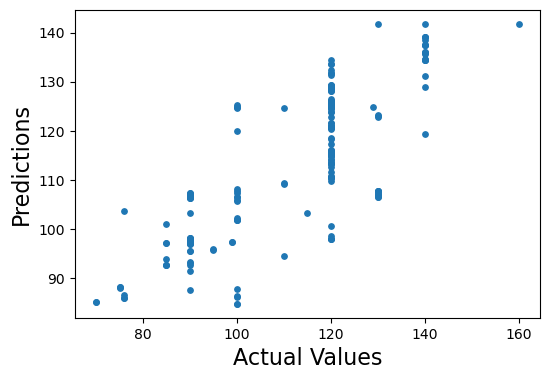

In [54]:
# https://www.geeksforgeeks.org/convert-a-numpy-array-to-a-pandas-series/  1/12/2022 
y_pred_df = pd.DataFrame(list(zip(y_test,test_pred)), columns = ['y_test','predictions'])

# Plotting predictions.
plt.figure(figsize=(6,4))
plt.scatter(data = y_pred_df, x = 'y_test', y='predictions', s=15)
plt.xlabel('Actual Values',fontsize=16)
plt.ylabel('Predictions', fontsize=16)
plt.show()

# Principal Component Analysis

## Component Selection using Scree Plot/Cumulative Variance Plot

In [55]:
# The first five rows of the dataframe
df.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [56]:
# Instantiating Scaler
scaler = StandardScaler()

# Calling categorical_numeric_data function to split data into numeric and category
numerical_df, categorical_df = categorical_numeric_data(df)

# Scaling the numerical dataframe
scaled_df = scaler.fit_transform(numerical_df)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


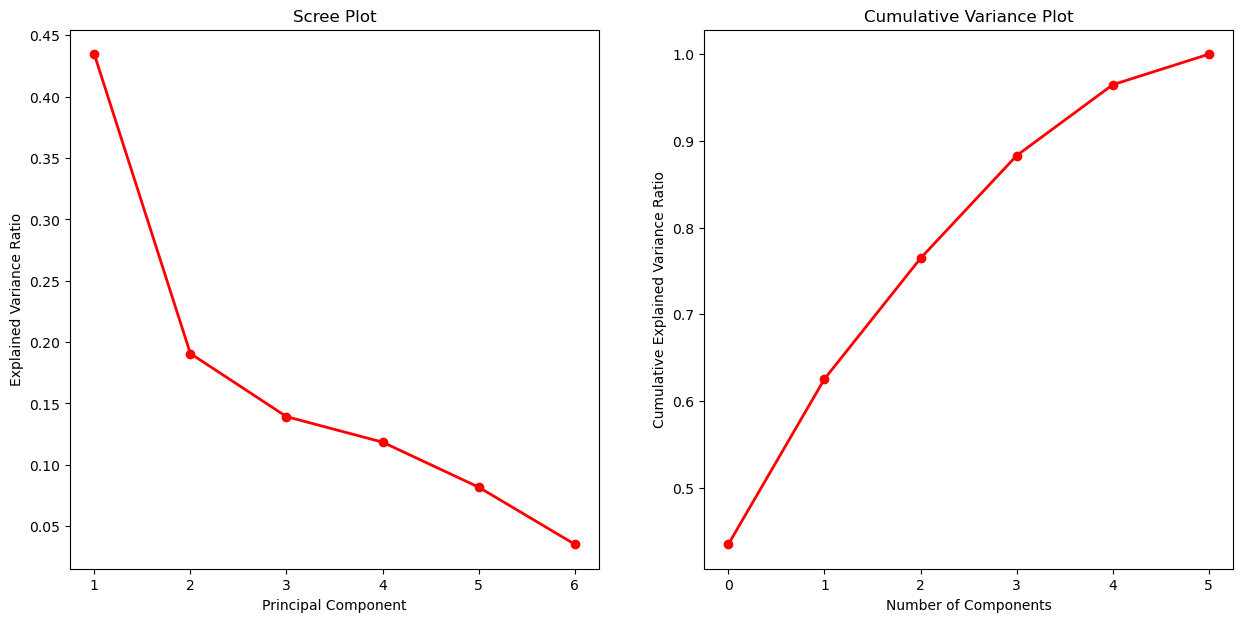

In [57]:
# Instantiating PCA
pca = PCA()

# Using PCA to fit the scaled numeric data
pca.fit(scaled_df)

# Plot scree plot and cumulative variance plot in a subplot (specifying number of rows and columns)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Scree plot
ax1.plot(np.arange(1, 7), pca.explained_variance_ratio_, 'ro-', linewidth=2)
ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')

# Cumulative Variance Plot
ax2.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
ax2.set_title('Cumulative Variance Plot')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')

plt.show()

In [58]:
# Choosing 4 as number of components
pca = PCA(n_components=4)

# fitting on the scaled data using 4 components
principalComponents = pca.fit_transform(scaled_df)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
#Let's see how much of the variance is explained.
pca.explained_variance_ratio_

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.43463191, 0.19067608, 0.13924574, 0.11844507])

In [60]:
# Converting to pandas dataframe
New_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3', 'PC4'])

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# Concatenating New_df with the target variable 
Final_df = pd.concat([New_df, df[['SystolicBP']]], axis = 1)
Final_df.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,PC4,SystolicBP
0,1.431401,1.523555,-0.370391,-0.654175,130
1,2.121966,-0.421513,0.510527,0.085820,140
2,-1.286251,1.106750,0.072955,0.281126,90
3,0.996341,-1.095369,0.295881,-0.745629,140
4,-0.460781,-0.163588,-0.910138,0.006372,120


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


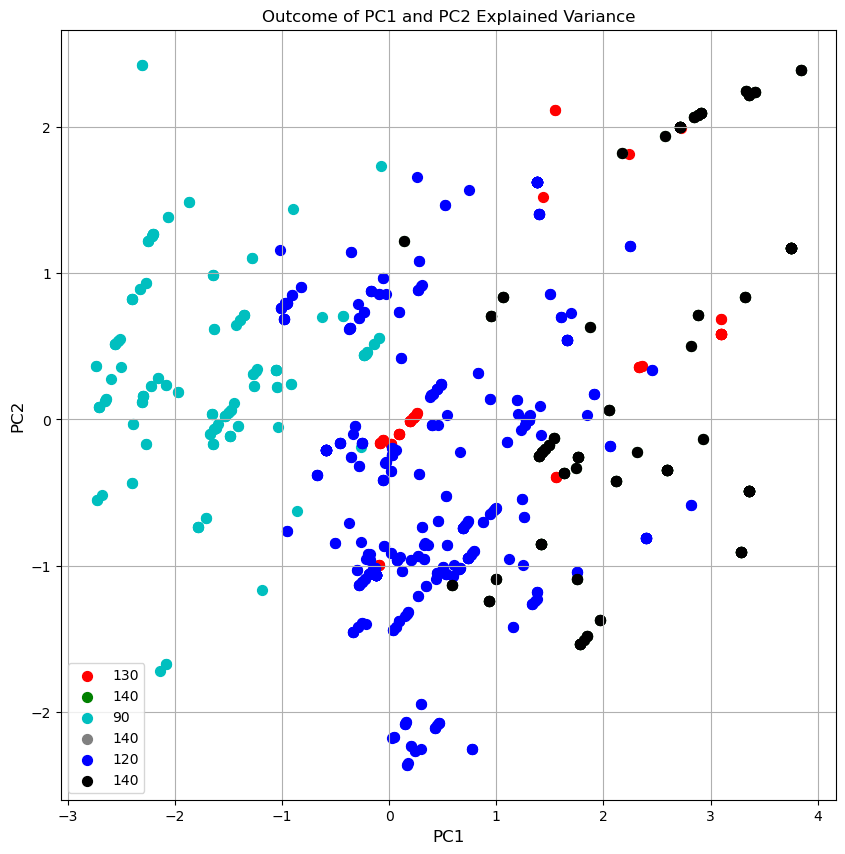

In [62]:
#visualizing the outcome of the PCA.

fig = plt.figure(figsize = (10,10))    #setting size of plot
ax = fig.add_subplot(1,1,1)            #adding subplots
ax.set_xlabel('PC1')                   #setting xlabel axis a PC1
ax.set_ylabel('PC2')                   #setting ylabel axis as PC2
targets = df['SystolicBP']             #defining target variable as SystolicBP
colors = ['r', 'g', 'c','gray','blue','black'] #setting colors for groups of systolicBP
for target, color in zip(targets,colors):  #iterating through target and color
    indicesToKeep = Final_df['SystolicBP'] == target  #retain indices
    ax.scatter(Final_df.loc[indicesToKeep, 'PC1']  #plotting the variables on scatter plot
               , Final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)                      #setting legend as target
ax.grid()                                #setting grid
plt.title('Outcome of PC1 and PC2 Explained Variance')  #setting plot title
plt.xlabel('PC1' ,fontsize='12')                        #plotting xlabel as PC1 and setting fontsize as 12
plt.ylabel('PC2', fontsize='12')                        #plotting ylabel as PC2 and setting fontsize as 12
plt.show()                                              #showing plot

# Investigating the relationship between age and heartrate  by means of age grouping

In [63]:
def group_func(data, group_ranges, group_names):
    """
    Groups a Pandas Series into specified groups based on given range of values.

    Params:
        data: A Pandas Series containing values to be grouped.
        group_ranges: A list of tuples representing the range of values for each group.
        group_names: A list of group names.

    Returns:
        A new Pandas Series with each value replaced by its corresponding group name.
    """
    
    # Create bins based on the given range of values
    bins = [r[0] for r in group_ranges] + [group_ranges[-1][1]]
    
    # Group the values into groups based on the given bins and group names
    groups = pd.cut(data, bins=bins, labels=group_names)
    
    # Return groups
    return groups

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
# Grouping ages and assigning group names to the groups 
age_group = [(5, 14),(14, 24), (24, 64), (64, 70)]
age_group_names = ['Adolescent', 'Youth', 'Adult', 'Aged']

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
# Creating a new column: "Age_Group" and calling the function to group the ages
df['Age_Group'] = group_func(df['Age'], age_group, age_group_names)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
# Grouping SystolicBP and DiastolicBP and assigning group names
sys_group = [(69, 109),(109, 140), (140, 160)]
sys_group_names = ['Low', 'Normal', 'High']

dia_group = [(48, 69),(69, 90), (90, 100)]
dia_group_names = ['Low', 'Normal', 'High']

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
# Creating a new columns: ("Systolic_Group", "Diastolic_Group") and calling the function to group them with the assigned names
df['Systolic_Group'] = group_func(df['SystolicBP'], sys_group, sys_group_names)
df['Diastolic_Group'] = group_func(df['DiastolicBP'], dia_group, dia_group_names)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# Confirming groups of systolic bp
df[(df['SystolicBP']>=141) & (df['SystolicBP']<=200)]['Systolic_Group'].unique()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['High']
Categories (3, object): ['Low' < 'Normal' < 'High']

In [69]:
# Confirming groups of diastolic bp
df[(df['DiastolicBP']>=48) & (df['DiastolicBP']<=69)]['Diastolic_Group'].unique()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Low']
Categories (3, object): ['Low' < 'Normal' < 'High']

In [70]:
# Viewing the Age-Group and HeartRate dataframe
df[['Age_Group', 'HeartRate']].head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age_Group,HeartRate
0,Adult,86
1,Adult,70
2,Adult,80
3,Adult,70
4,Adult,76


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


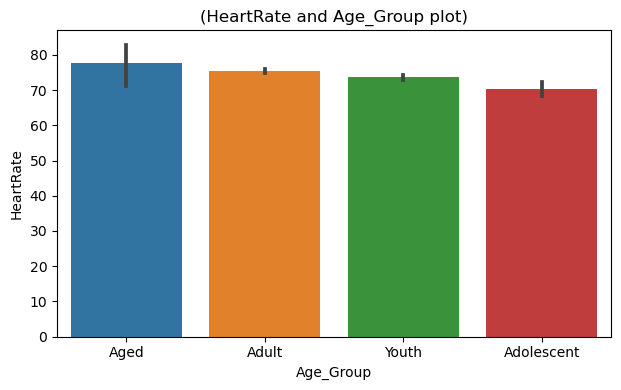

In [71]:
# Calling the function plot_bar_subplots to show bar plot of Age against Heartrate
plot_bar_subplots(df, 'Age_Group', ['HeartRate'], ['Aged', 'Adult', 'Youth', 'Adolescent'])

In [72]:
# Calculating the meanheartrate across all age groups
mean_heartrate_by_age_group = df.groupby('Age_Group')['HeartRate'].mean()
print(mean_heartrate_by_age_group)

Age_Group
Adolescent    70.203704
Youth         73.621287
Adult         75.422868
Aged          77.600000
Name: HeartRate, dtype: float64


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Association Mining

In [73]:
# Encoding systolic and Diastolic Groups using pandas get dummies
sys_dias = pd.get_dummies(df[['Systolic_Group','Diastolic_Group']], prefix=['sys','dia'])
sys_dias.head()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sys_Low,sys_Normal,sys_High,dia_Low,dia_Normal,dia_High
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,0,1,0,1,0,0


In [74]:
# Checking the rules
frequent_itemsets = apriori(sys_dias, min_support=0.0001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Printing rules
rules

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\ugoch\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sys_Low),(dia_Low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035
1,(dia_Low),(sys_Low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835
2,(dia_Normal),(sys_Normal),0.562130,0.650888,0.489152,0.870175,1.336906,0.123268,2.689109
3,(sys_Normal),(dia_Normal),0.650888,0.562130,0.489152,0.751515,1.336906,0.123268,1.762159
4,(dia_High),(sys_Normal),0.121302,0.650888,0.111440,0.918699,1.411456,0.032486,4.294083
5,(sys_Normal),(dia_High),0.650888,0.121302,0.111440,0.171212,1.411456,0.032486,1.060221
6,(sys_High),(dia_High),0.009862,0.121302,0.009862,1.000000,8.243902,0.008666,inf
7,(dia_High),(sys_High),0.121302,0.009862,0.009862,0.081301,8.243902,0.008666,1.077761


In [75]:
# Selecting necessary rule columns
Rules = rules[['antecedents','consequents','support','confidence','lift','conviction']]

#Printing rules
Rules

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,conviction
0,(sys_Low),(dia_Low),0.266272,0.784884,2.479352,3.177035
1,(dia_Low),(sys_Low),0.266272,0.841121,2.479352,4.158835
2,(dia_Normal),(sys_Normal),0.489152,0.870175,1.336906,2.689109
3,(sys_Normal),(dia_Normal),0.489152,0.751515,1.336906,1.762159
4,(dia_High),(sys_Normal),0.111440,0.918699,1.411456,4.294083
5,(sys_Normal),(dia_High),0.111440,0.171212,1.411456,1.060221
6,(sys_High),(dia_High),0.009862,1.000000,8.243902,inf
7,(dia_High),(sys_High),0.009862,0.081301,8.243902,1.077761


# Clustering

In [76]:
# Creating a pandas series with "systolicBP"
sys_bp = df['SystolicBP']

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
# Converting the series to a numpy array and reshaping
cluster_df = np.array(sys_bp).reshape(-1,1)
cluster_df

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[130],
       [140],
       [ 90],
       ...,
       [ 85],
       [120],
       [120]], dtype=int64)

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


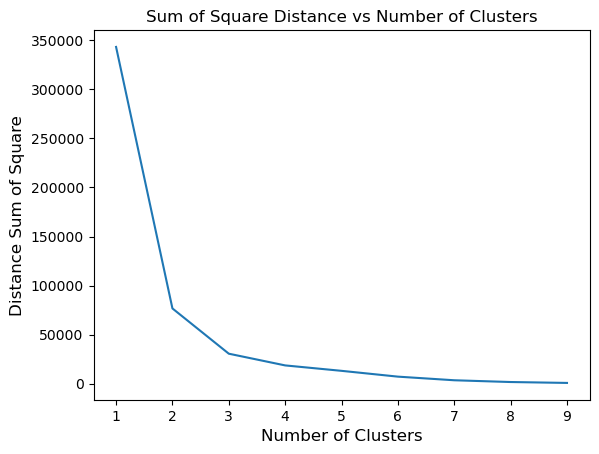

In [78]:
# Calculates Sum of Square distance for different number of clusters 
ss_distance = []
K = range(1, 10)
for clusters in K:
    K_means_clusters = KMeans(n_clusters = clusters, n_init=3, random_state = 25)
    K_means_clusters.fit(cluster_df)
    ss_distance.append(K_means_clusters.inertia_)

# Plots the sum of square distance for different number of clusters
plt.title('Sum of Square Distance vs Number of Clusters')   
plt.plot(K, ss_distance)
plt.xlabel('Number of Clusters' ,fontsize='12')
plt.ylabel('Distance Sum of Square', fontsize='12')
plt.show()

In [79]:
#Create a KMeans object with 3 clusters
k_means = KMeans(n_clusters = 3)

# Fit the KMeans object to the data and obtain the cluster labels for each data point
kmeans_cluster_labels = k_means.fit_predict(cluster_df)

# Add a new column to the original dataframe with the cluster labels
df['labels'] = kmeans_cluster_labels

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


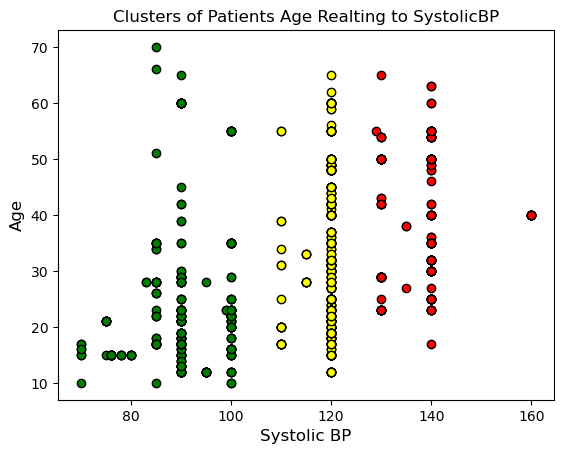

In [80]:
# Get a list of unique cluster labels from the KMeans clustering output
model_labels = list(set(kmeans_cluster_labels))

# Define a list of colors to use for each cluster
colors = ['red', 'green', 'yellow', 'magenta']

# Loop through each cluster label and plot the data points belonging to that cluster
for label in model_labels:
    
    # Get the subset of the dataframe that belongs to the current cluster label
    label_ = df[kmeans_cluster_labels == label]
    
    # Create a scatter plot of the data points in the current cluster with a color corresponding to the cluster label
    plt.scatter(label_['SystolicBP'], label_['Age'], color=colors[label], edgecolor='k')
    plt.title('Clusters of Patients Age Realting to SystolicBP')
    plt.xlabel('Systolic BP' ,fontsize='12')
    plt.ylabel('Age', fontsize='12')
# Show the scatter plot
plt.show()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


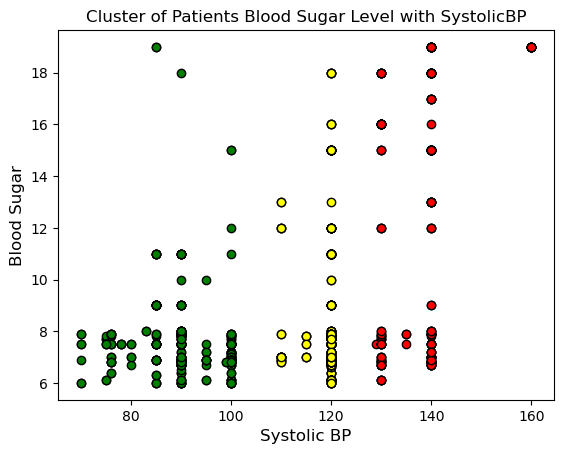

In [81]:
# Get a list of unique cluster labels from the KMeans clustering output
model_labels = list(set(kmeans_cluster_labels))

# Define a list of colors to use for each cluster
colors = ['red', 'green', 'yellow', 'magenta']

# Loop through each cluster label and plot the data points belonging to that cluster
for label in model_labels:
    
    # Get the subset of the dataframe that belongs to the current cluster label
    label_ = df[kmeans_cluster_labels == label]
    
    # Create a scatter plot of the data points in the current cluster with a color corresponding to the cluster label
    plt.scatter(label_['SystolicBP'], label_['BS'], color=colors[label], edgecolor='k')
    plt.title('Cluster of Patients Blood Sugar Level with SystolicBP')
    plt.xlabel('Systolic BP' ,fontsize='12')
    plt.ylabel('Blood Sugar', fontsize='12')
    
# Show the scatter plot
plt.show()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


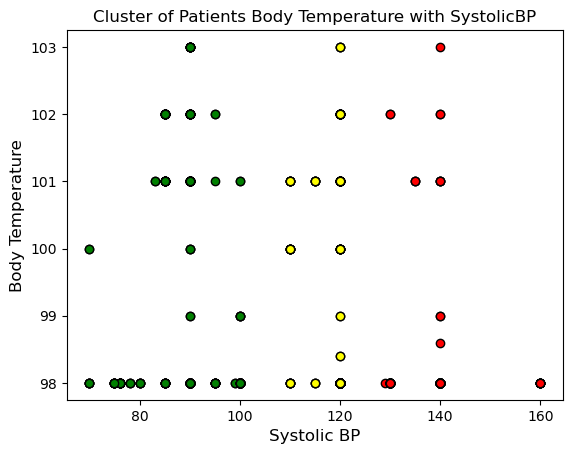

In [82]:
# Get a list of unique cluster labels from the KMeans clustering output
model_labels = list(set(kmeans_cluster_labels))

# Define a list of colors to use for each cluster
colors = ['red', 'green', 'yellow', 'magenta']

# Loop through each cluster label and plot the data points belonging to that cluster
for label in model_labels:
    
    # Get the subset of the dataframe that belongs to the current cluster label
    label_ = df[kmeans_cluster_labels == label]
    
    # Create a scatter plot of the data points in the current cluster with a color corresponding to the cluster label
    plt.scatter(label_['SystolicBP'], label_['BodyTemp'], color=colors[label], edgecolor='k')
    plt.title('Cluster of Patients Body Temperature with SystolicBP')
    plt.xlabel('Systolic BP' ,fontsize='12')
    plt.ylabel('Body Temperature', fontsize='12')
    
# Show the scatter plot
plt.show()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


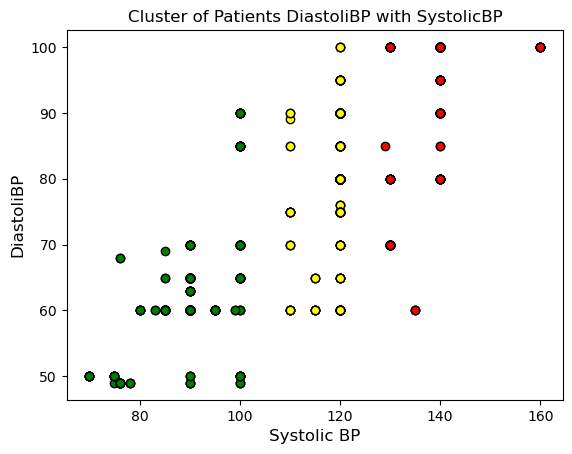

In [83]:
# Get a list of unique cluster labels from the KMeans clustering output
model_labels = list(set(kmeans_cluster_labels))

# Define a list of colors to use for each cluster
colors = ['red', 'green', 'yellow', 'magenta']

# Loop through each cluster label and plot the data points belonging to that cluster
for label in model_labels:
    
    # Get the subset of the dataframe that belongs to the current cluster label
    label_ = df[kmeans_cluster_labels == label]
    
    # Create a scatter plot of the data points in the current cluster with a color corresponding to the cluster label
    plt.scatter(label_['SystolicBP'], label_['DiastolicBP'], color=colors[label], edgecolor='k')
    plt.title('Cluster of Patients DiastoliBP with SystolicBP')
    plt.xlabel('Systolic BP' ,fontsize='12')
    plt.ylabel('DiastoliBP', fontsize='12')
    
# Show the scatter plot
plt.show()

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


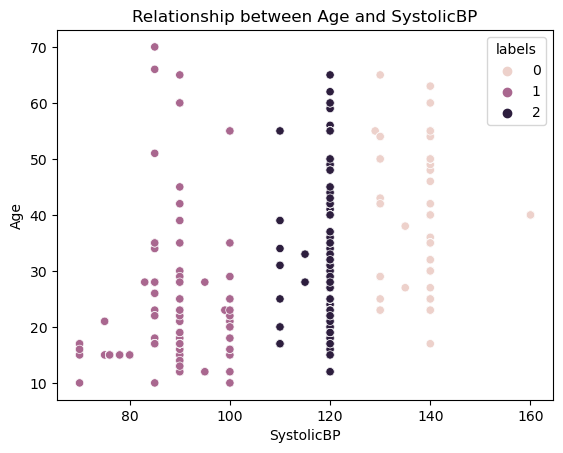

In [84]:
# Create a scatter plot using Seaborn's `scatterplot()` function
sns.scatterplot(data=df, x='SystolicBP', y='Age', hue='labels')
plt.title('Relationship between Age and SystolicBP')
plt.show()

# Correlation between Age and SystolicBP

C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


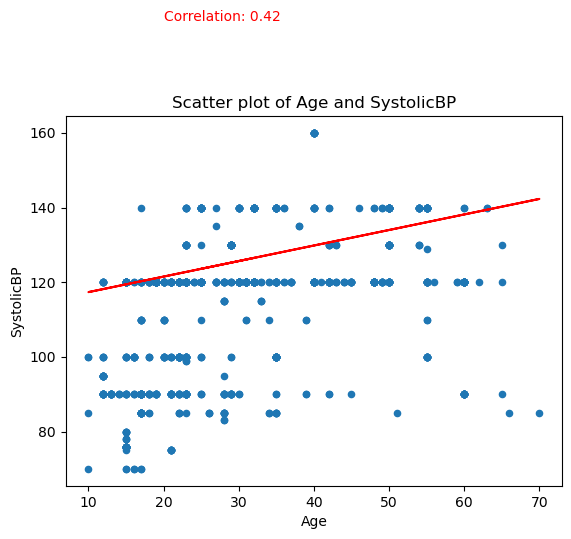

In [85]:
# assuming you have two columns Age and SystolicBP in a DataFrame df
df.plot(kind='scatter', x='Age', y='SystolicBP')
plt.title('Scatter plot of Age and SystolicBP')
plt.xlabel('Age')
plt.ylabel('SystolicBP')

# add a line of best fit and correlation coefficient
corr = df['Age'].corr(df['SystolicBP'])
plt.plot(df['Age'], corr * df['Age'] + df['SystolicBP'].mean(), color='red')
plt.text(20, 190, f'Correlation: {corr:.2f}', color='red')

plt.show()


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


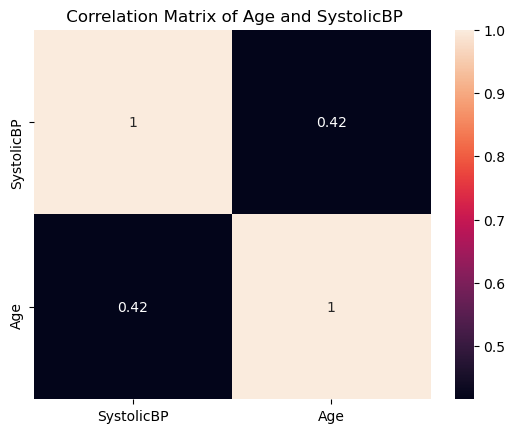

In [86]:
# plotting correlation between Age and SystolicBP
sns.heatmap(df[['SystolicBP','Age']].corr(),annot=True)

# Setting title
plt.title(' Correlation Matrix of Age and SystolicBP')

# Viewing image
plt.show()

## Parametric: Pearson Correlation

In [87]:
# Calculating pearson coefficient and p-value 
pearsonr_coefficient, p_value = pearsonr(df['Age'], df['SystolicBP'])

#Printing result
print('PearsonR Correlation %0.3f'% (pearsonr_coefficient))

PearsonR Correlation 0.416


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Nonparametric: Spearman Correlation

In [88]:
# Calculating spearman coeffiecient and p-value
spearmanr_coefficient, p_value = spearmanr(df['Age'], df['SystolicBP'])

# Printing result
print('SpearmanR Correlation %0.3f'% (spearmanr_coefficient))

SpearmanR Correlation 0.485


C:\Users\ugoch\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
